In [1]:
# Step 1: Importing libraries and Data Loading

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

datasets = {
    "poverty": r'C:\Users\JFB\Documents\Pythoncsv\Personal\populationinpoverty.csv',
    "economy": r'C:\Users\JFB\Documents\Pythoncsv\Personal\economicgrowth.csv',
    "education": r'C:\Users\JFB\Documents\Pythoncsv\Personal\educationspending.csv',
    "electricity": r'C:\Users\JFB\Documents\Pythoncsv\Personal\electricityaccess.csv',
    "tourism": r'C:\Users\JFB\Documents\Pythoncsv\Personal\tourismtrips.csv',
    "internet": r'C:\Users\JFB\Documents\Pythoncsv\Personal\internetuse.csv',
    "renewableenergy": r'C:\Users\JFB\Documents\Pythoncsv\Personal\renewableelectricity.csv',
    "homicides": r'C:\Users\JFB\Documents\Pythoncsv\Personal\homicides.csv',
    "healthspending": r'C:\Users\JFB\Documents\Pythoncsv\Personal\healthspending.csv',
    "agriculturalland": r'C:\Users\JFB\Documents\Pythoncsv\Personal\agriculturalland.csv',
}

# Load each dataset and filter for Honduras
honduras_datasets = {}
for key, path in datasets.items():
    data = pd.read_csv(path)
    honduras_data = data[data['Entity'] == 'Honduras']
    honduras_datasets[key] = honduras_data

honduras_datasets["poverty"].head()

,Entity,Year,Share below $1 a day,Share below $2.15 a day
900,Honduras,1989,16.559424,39.959561
901,Honduras,1990,18.560977,41.997452
902,Honduras,1991,9.142681,30.774723
903,Honduras,1992,6.505092,26.968343
904,Honduras,1993,5.668213,21.429638


In [2]:
# Step 2: Data Merging

# Start with the poverty dataset as the base
merged_data = honduras_datasets['poverty']

# Merge other datasets based on "Entity" and "Year"
for key, dataset in honduras_datasets.items():
    if key != 'poverty':
        merged_data = pd.merge(merged_data, dataset, on=['Entity', 'Year'], how='outer')
        
# Filter the data to include only years from 1990 to 2021
merged_data = merged_data[(merged_data['Year'] >= 1990) & (merged_data['Year'] <= 2021)]

# Impute missing values using mean imputation
merged_data.fillna(merged_data.mean(), inplace=True)


merged_data.head()  # Displaying first few rows of merged data

C:\Users\JFB\AppData\Local\Temp\ipykernel_9384\4260097069.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.fillna(merged_data.mean(), inplace=True)


,Entity,Year,Share below $1 a day,Share below $2.15 a day,GDP per capita,education spending,urban access to electricity percentage,rural access to electricity percentage,tourists,Internet users,Renewable electricity share,homicides,health spending,Agricultural land hectares
1,Honduras,1990,18.560977,41.997452,3253.6936,20.538755,96.105879,54.492805,644703.703704,0.0,47.254074,495.53280,11.939,3320000.0
2,Honduras,1991,9.142681,30.774723,3317.5164,20.538755,88.700620,31.257088,644703.703704,0.0,47.254074,703.79320,11.939,3342000.0
3,Honduras,1992,6.505092,26.968343,3328.1123,20.538755,89.851265,37.012500,644703.703704,0.0,47.254074,955.10614,11.939,3355000.0
4,Honduras,1993,5.668213,21.429638,3499.3900,20.538755,92.082520,38.717102,644703.703704,0.0,47.254074,1252.52270,11.939,3548000.0
5,Honduras,1994,7.656456,24.304441,3484.4119,12.888750,92.144470,44.522860,644703.703704,0.0,47.254074,1682.44540,11.939,3520000.0


C:\Users\JFB\AppData\Local\Temp\ipykernel_9384\853500742.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


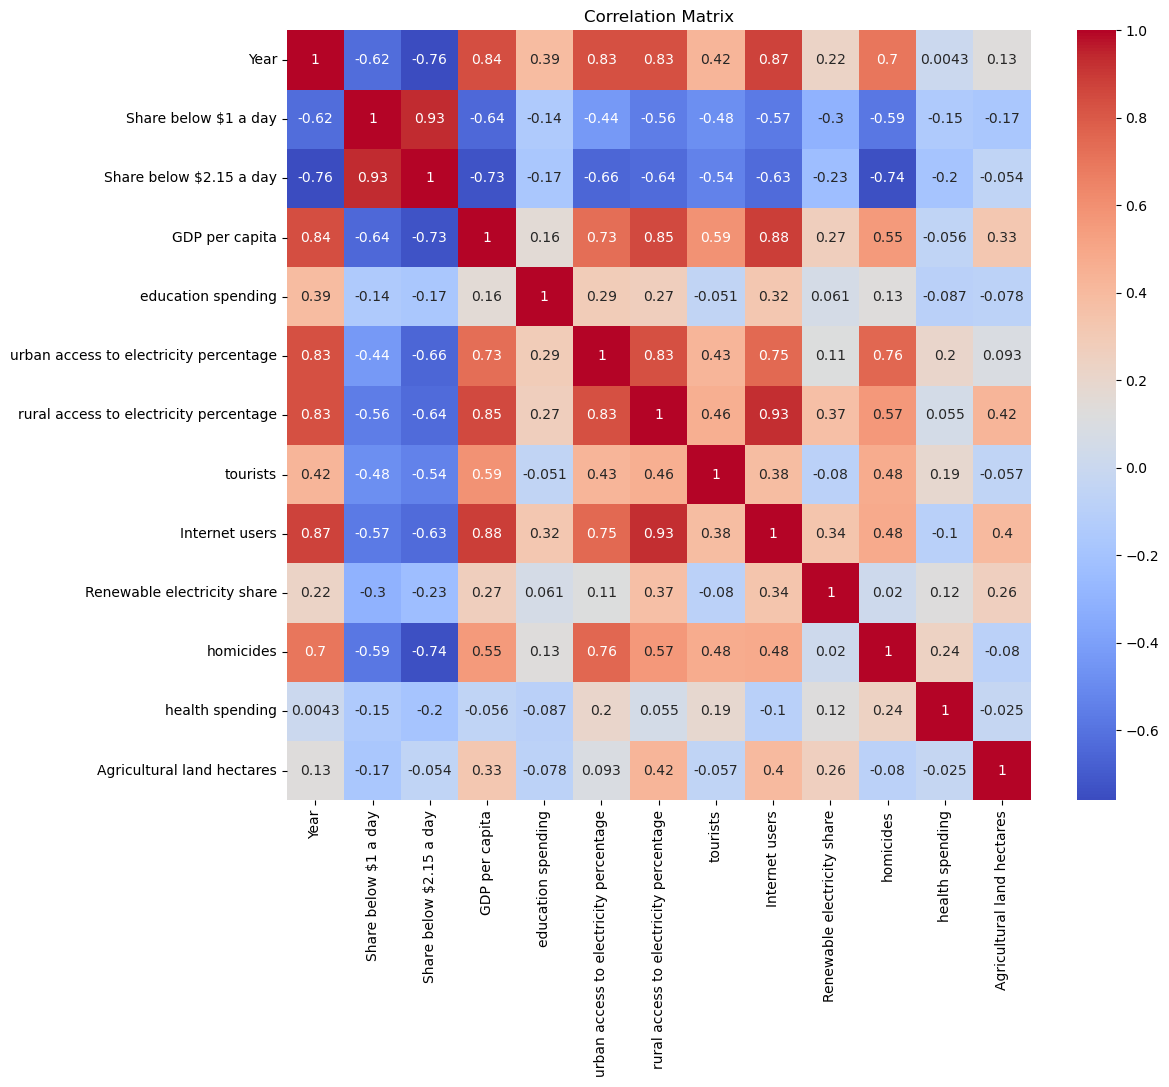

In [3]:
# Step 3: Visualization and Correlation Analysis

# Plot a heatmap of correlations
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

correlation_matrix.to_csv('correlation_matrix.csv', index=True)

In [4]:
# Determine the top 5 most correlated variables to "Share below $1 a day" (excluding "Share below $2.15 a day")
correlation_matrix = merged_data.corr()
correlations_poverty = correlation_matrix['Share below $1 a day'].drop(['Share below $1 a day', 'Share below $2.15 a day']).abs().sort_values(ascending=False)
top_5_predictors_poverty = correlations_poverty.head(5).index.tolist()
top_5_predictors_poverty


C:\Users\JFB\AppData\Local\Temp\ipykernel_9384\3000520023.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


['GDP per capita',
 'Year',
 'homicides',
 'Internet users',
 'rural access to electricity percentage']

In [5]:
# Separate predictor variables (X) and target variable (y) for Poverty using the top 5 predictors
X_poverty = merged_data[top_5_predictors_poverty]
y_poverty = merged_data['Share below $1 a day']

# Adding a constant (intercept) to the model
X_poverty = sm.add_constant(X_poverty)

# Fit the regression model for Poverty
model_poverty = sm.OLS(y_poverty, X_poverty).fit()

# Display the results for Poverty
print(model_poverty.summary())


                             OLS Regression Results                             
Dep. Variable:     Share below $1 a day   R-squared:                       0.498
Model:                              OLS   Adj. R-squared:                  0.401
Method:                   Least Squares   F-statistic:                     5.155
Date:                  Fri, 28 Jul 2023   Prob (F-statistic):            0.00204
Time:                          17:16:42   Log-Likelihood:                -73.817
No. Observations:                    32   AIC:                             159.6
Df Residuals:                        26   BIC:                             168.4
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [6]:
# Separate predictor variables (X) and target variable (y) for Homicides using its highest correlation predictors
X_homicides = merged_data[['urban access to electricity percentage', 'Share below $1 a day', 'Year', 'tourists', 'rural access to electricity percentage']]
y_homicides = merged_data['homicides']

# Adding a constant (intercept) to the model
X_homicides = sm.add_constant(X_homicides)

# Fit the regression model for Homicides
model_homicides = sm.OLS(y_homicides, X_homicides).fit()

# Display the results for Homicides
print(model_homicides.summary())


                            OLS Regression Results                            
Dep. Variable:              homicides   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     14.33
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           8.95e-07
Time:                        17:16:42   Log-Likelihood:                -262.46
No. Observations:                  32   AIC:                             536.9
Df Residuals:                      26   BIC:                             545.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------